In [1]:
# import the packages 
import numpy as np 
from qiskit.quantum_info import Statevector
from numpy import sqrt 
import matplotlib.pyplot as plt 
from qiskit.visualization import plot_histogram

In [2]:
# define some state vectors and check if they are valid choices 

u = Statevector([sqrt(3/4), sqrt(1/4)])
v = Statevector([1.0j/(sqrt(2)), 1/(sqrt(2))])
w = Statevector([2/5, 3/5])

print('u: ', u)
print('v: ', v)
print('w : ', w)

display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))

u:  Statevector([0.8660254+0.j, 0.5      +0.j],
            dims=(2,))
v:  Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))
w :  Statevector([0.4+0.j, 0.6+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
# check if the state vectors satisfy the normalisation constraint 
print(u.is_valid())
print(v.is_valid())
print(w.is_valid())


True
True
False


In [4]:
# can only meausure vectors that are normalised 
# meausure performs a standard basis measurment and returns the outcome of the measurment and the final state 
umeasure = u.measure()
vmeasure = v.measure()
print(umeasure)
print(vmeasure)

('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))


Stats u :  {'0': 7463, '1': 2537}
Stats v :  {'0': 5011, '1': 4989}


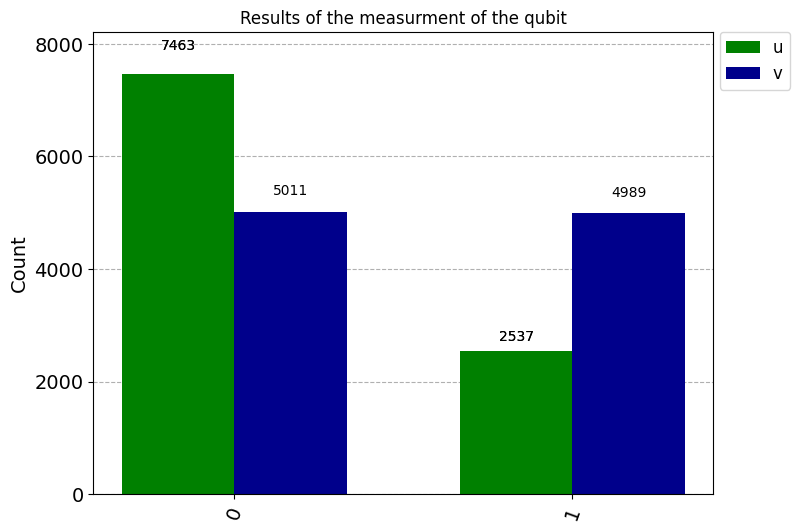

In [5]:
# get more results by measuring the state an arbitrary number of times

u_statistics = u.sample_counts(10000)                        # measure the qubit 1000 times and stores the result 
v_statistics = v.sample_counts(10000)                        # does the same on v 

print('Stats u : ', u_statistics)
print('Stats v : ', v_statistics)

legenda = ['u', 'v']
colors = ['green', 'darkblue']
total_stats = [u_statistics, v_statistics]
plot_histogram(total_stats, legend = legenda, color = colors, title = 'Results of the measurment of the qubit', figsize = [8,6])



In [6]:
# we can also define unitary operators that act on the qubits
from qiskit.quantum_info import Operator

# let us define, for example the pauli gates 
X = Operator([[0,1],[1,0]])
Y = Operator([[0,-1.0j],[1.0j, 0]])
Z = Operator([[1,0],[0,-1]])

display(X.draw('latex'))
display(Y.draw('latex'))
display(Z.draw('latex'))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/Users/lorenzospera/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


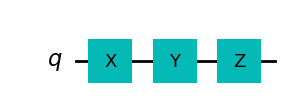

<bound method QuantumCircuit.draw of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x147304e50>>

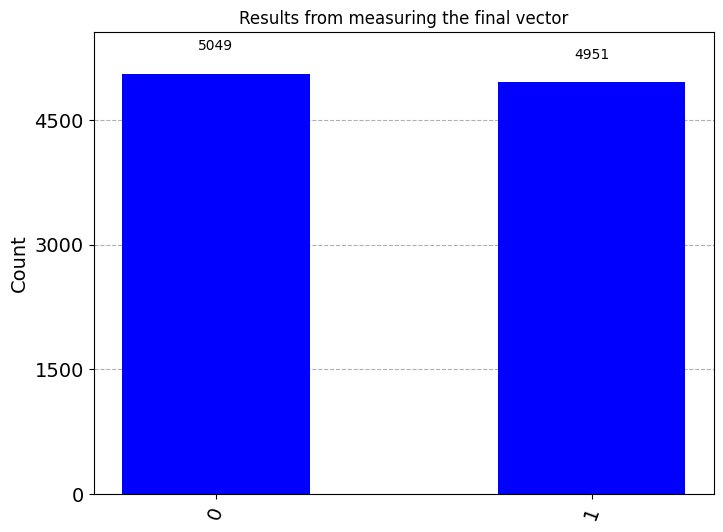

In [7]:
# let us now define a quantum circuit and see how it acts on our system
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)                      # 1 specifies the number of quibits we are operating on 

u = Statevector([1/sqrt(2), 1/sqrt(2)])

qc.x(0)                                     # circuits that implememt the 3 Pauli gates defined above 
qc.y(0)
qc.z(0)

display(qc.draw(output='mpl'))
display(qc.draw)

u = u.evolve(qc)                            # apply the circuit on the initial qubit 

u_stats = u.sample_counts(10000)
plot_histogram(u_stats, color = ['blue'], title = 'Results from measuring the final vector', figsize = [8,6])

